# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#Setting up query and converting the temperature from Kelvin to Celsius.
url = "http://api.openweathermap.org/data/2.5/weather?"
api_key = url + "q=" + city + "&appid=" + weather_api_key + "&units=Imperial"
print("Beginning Data Retrieval\n-----------------------------")
weather_response = requests.get(api_key).json()

#Creating empy lists to store desired values based on category.
City = []
Lat = []        
Lng = []   
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []

#setting counter when processing values of each city data.
count = 1
set_count = 1

for city in cities:
    
    #Try block to prevent error of city not found by skipping it and retrieving necessary data for each city.
    try:
        
        response = requests.get(url + "q=" + city + "&appid=" + weather_api_key + "&units=Imperial").json()
        City.append(response['name'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_Temp.append(response['main']['temp_max'])
        Humidity.append(response['main']['humidity'])
        Cloudiness.append(response['clouds']['all'])
        Wind_Speed.append(response['wind']['speed'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        print(f"Processing Record {count} of Set {set_count} | {city}")
        
        #Used to describe set and record and reset values after every set.
        if count != 50:
            count += 1
        else:
            count = 0
            set_count += 1 
        
        #Sleep to prevent overuse of API key
        time.sleep(1.02)
        
    except:
        
        print("City not found. Skipping...")

print("-----------------------------\nData Retrieval Complete\n-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | hithadhoo
Processing Record 5 of Set 1 | batemans bay
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | souillac
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | kaitangata
Processing Record 11 of Set 1 | rawson
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | mahebourg
Processing Record 15 of Set 1 | airai
Processing Record 16 of Set 1 | ahipara
City not found. Skipping...
Processing Record 17 of Set 1 | celendin
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | bereda
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | kodiak
Processing Record 22 of Set 1 | mokhsogollokh
Processing Record 23 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
#Dataframe to hold list values in previous example.
df = pd.DataFrame({'City':City, 'Latitude':Lat, 'Longitude':Lng, 'Max Temperature':Max_Temp, 
              'Humidity':Humidity, 'Cloudiness':Cloudiness, 'Wind Speed':Wind_Speed, 
              'Country':Country, 'Date':Date})

#To check current date for graphing year on matplotlib graphs
date = df['Date'].apply(lambda x: time.strftime('%m-%d-%Y', time.localtime(x)))

#Exporting dataframe to csv and removing initial index.
city_data = df.to_csv('../Resources/city_data.csv', index = False)

df.count()

City               557
Latitude           557
Longitude          557
Max Temperature    557
Humidity           557
Cloudiness         557
Wind Speed         557
Country            557
Date               557
dtype: int64

In [25]:
df.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.53,20.04,57.20,71,0,9.17,ZA,1595866549
1,Albany,42.60,-73.97,91.00,39,86,1.99,US,1595866252
2,Avarua,-21.21,-159.78,69.80,88,57,5.82,CK,1595866552
3,Hithadhoo,-0.60,73.08,82.94,74,100,11.25,MV,1595866553
4,Batemans Bay,-35.72,150.18,55.00,100,100,7.00,AU,1595866554


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [26]:
# Get the indices of cities that have humidity over 100%.
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#Used drop function to after locating all the values with 100 humidity and 
#get index for those values in order for drop function to drop those indexes

clean_city_data = df.drop(df[df['Humidity'] == 100].index, inplace = False)
clean_city_data.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.53,20.04,57.20,71,0,9.17,ZA,1595866549
1,Albany,42.60,-73.97,91.00,39,86,1.99,US,1595866252
2,Avarua,-21.21,-159.78,69.80,88,57,5.82,CK,1595866552
3,Hithadhoo,-0.60,73.08,82.94,74,100,11.25,MV,1595866553
5,New Norfolk,-42.78,147.06,42.01,90,94,2.21,AU,1595866346


In [27]:
# Extract relevant fields from the data frame
# Export the City_Data into a csv

clean_city_data.to_csv('../Resources/clean_city_data.csv', index = False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

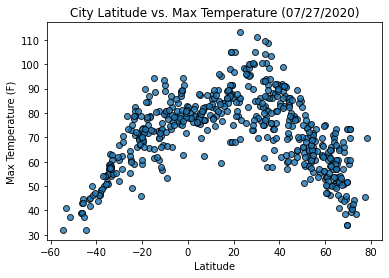

In [28]:
plt.scatter(x = clean_city_data['Latitude'], y = clean_city_data['Max Temperature'], alpha = 0.8, edgecolors = 'black')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (07/27/2020)")
plt.show()

## Latitude vs. Humidity Plot

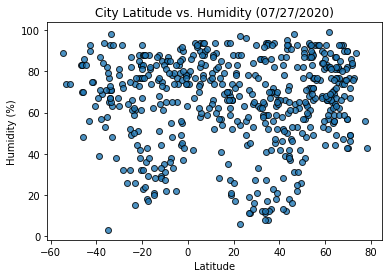

In [29]:
plt.scatter(x = clean_city_data['Latitude'], y = clean_city_data['Humidity'], alpha = 0.8, edgecolors = 'black')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (07/27/2020)")
plt.show()

## Latitude vs. Cloudiness Plot

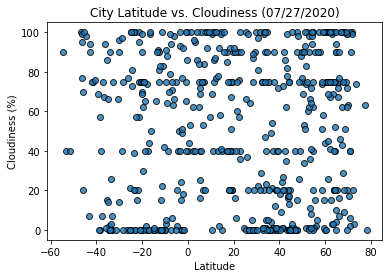

In [30]:
plt.scatter(x = clean_city_data['Latitude'], y = clean_city_data['Cloudiness'], alpha = 0.8, edgecolors = 'black')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (07/27/2020)")
plt.show()

## Latitude vs. Wind Speed Plot

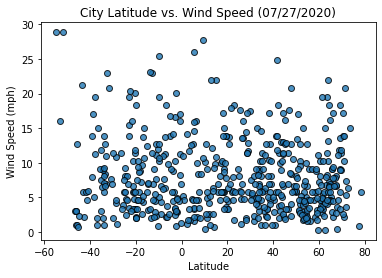

In [31]:
plt.scatter(x = clean_city_data['Latitude'], y = clean_city_data['Wind Speed'], alpha = 0.8, edgecolors = 'black')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (07/27/2020)")
plt.show()

## Linear Regression

In [32]:
# OPTIONAL: Create a function to create Linear Regression plots

In [33]:
# Create Northern and Southern Hemisphere DataFrames

#Seperated the dataframes by 'latitude' column.
Northern_Hem_df = clean_city_data.loc[clean_city_data['Latitude'] > 0]
Southern_Hem_df = clean_city_data.loc[clean_city_data['Latitude'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.44573244047504673


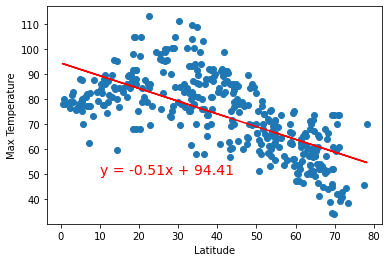

In [65]:
(slope, intercept, rvalue, Pvalue, Sterr) = linregress(Northern_Hem_df['Latitude'], Northern_Hem_df['Max Temperature'])
print(f"The r-squared is: {rvalue ** 2}")

plt.scatter(Northern_Hem_df['Latitude'], Northern_Hem_df['Max Temperature'])
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

#Slope formula: y = mx + b
y = slope * Northern_Hem_df['Latitude'] + intercept

#Linear regression plot and formula display.
plt.plot(Northern_Hem_df['Latitude'], y, color = 'red')
plt.text(10,50,f"y = {round(slope, 2)}x + {round(intercept , 2)}", fontsize = 14, color = 'Red')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.690359934389896


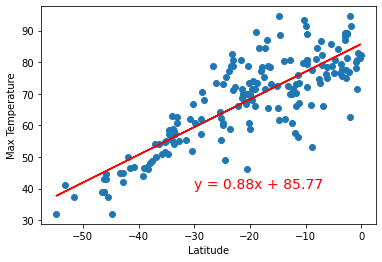

In [66]:
(slope, intercept, rvalue, Pvalue, Sterr) = linregress(Southern_Hem_df['Latitude'], Southern_Hem_df['Max Temperature'])
print(f"The r-squared is: {rvalue ** 2}")

plt.scatter(Southern_Hem_df['Latitude'], Southern_Hem_df['Max Temperature'])
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

#Slope formula: y = mx + b
y = slope * Southern_Hem_df['Latitude'] + intercept

#Linear regression plot and formula display.
plt.plot(Southern_Hem_df['Latitude'], y, color = 'red')
plt.text(-30,40,f"y = {round(slope, 2)}x + {round(intercept , 2)}", fontsize = 14, color = 'Red')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0017947467481487396


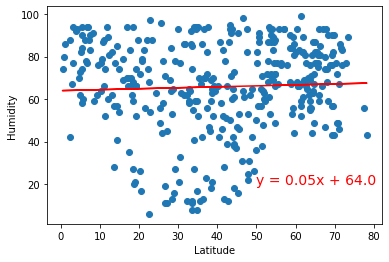

In [72]:
(slope, intercept, rvalue, Pvalue, Sterr) = linregress(Northern_Hem_df['Latitude'], Northern_Hem_df['Humidity'])
print(f"The r-squared is: {rvalue ** 2}")

plt.scatter(Northern_Hem_df['Latitude'], Northern_Hem_df['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')

#Slope formula: y = mx + b
y = slope * Northern_Hem_df['Latitude'] + intercept

#Linear regression plot and formula display.
plt.plot(Northern_Hem_df['Latitude'], y, color = 'red')
plt.text(50,20,f"y = {round(slope, 2)}x + {round(intercept , 2)}", fontsize = 14, color = 'Red')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.015570111851119981


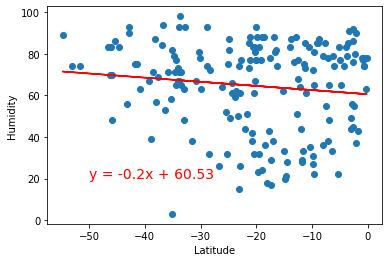

In [79]:
(slope, intercept, rvalue, Pvalue, Sterr) = linregress(Southern_Hem_df['Latitude'], Southern_Hem_df['Humidity'])
print(f"The r-squared is: {rvalue ** 2}")

plt.scatter(Southern_Hem_df['Latitude'], Southern_Hem_df['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')

#Slope formula: y = mx + b
y = slope * Southern_Hem_df['Latitude'] + intercept

#Linear regression plot and formula display.
plt.plot(Southern_Hem_df['Latitude'], y, color = 'red')
plt.text(-50,20,f"y = {round(slope, 2)}x + {round(intercept , 2)}", fontsize = 14, color = 'Red')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0020510042335901784


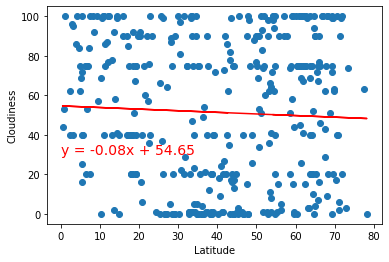

In [84]:
(slope, intercept, rvalue, Pvalue, Sterr) = linregress(Northern_Hem_df['Latitude'], Northern_Hem_df['Cloudiness'])
print(f"The r-squared is: {rvalue ** 2}")

plt.scatter(Northern_Hem_df['Latitude'], Northern_Hem_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

#Slope formula: y = mx + b
y = slope * Northern_Hem_df['Latitude'] + intercept

#Linear regression plot and formula display.
plt.plot(Northern_Hem_df['Latitude'], y, color = 'red')
plt.text(0,30,f"y = {round(slope, 2)}x + {round(intercept , 2)}", fontsize = 14, color = 'Red')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0015877001408617362


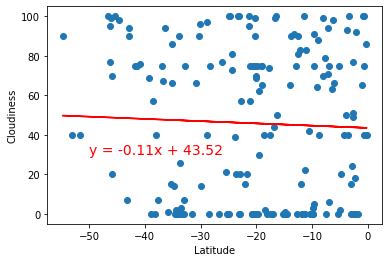

In [88]:
(slope, intercept, rvalue, Pvalue, Sterr) = linregress(Southern_Hem_df['Latitude'], Southern_Hem_df['Cloudiness'])
print(f"The r-squared is: {rvalue ** 2}")

plt.scatter(Southern_Hem_df['Latitude'], Southern_Hem_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

#Slope formula: y = mx + b
y = slope * Southern_Hem_df['Latitude'] + intercept

#Linear regression plot and formula display.
plt.plot(Southern_Hem_df['Latitude'], y, color = 'red')
plt.text(-50,30,f"y = {round(slope, 2)}x + {round(intercept , 2)}", fontsize = 14, color = 'Red')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0016355730455661441


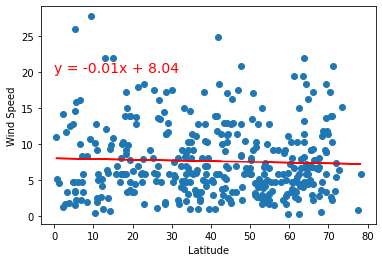

In [97]:
(slope, intercept, rvalue, Pvalue, Sterr) = linregress(Northern_Hem_df['Latitude'], Northern_Hem_df['Wind Speed'])
print(f"The r-squared is: {rvalue ** 2}")

plt.scatter(Northern_Hem_df['Latitude'], Northern_Hem_df['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

#Slope formula: y = mx + b
y = slope * Northern_Hem_df['Latitude'] + intercept

#Linear regression plot and formula display.
plt.plot(Northern_Hem_df['Latitude'], y, color = 'red')
plt.text(0,20,f"y = {round(slope, 2)}x + {round(intercept , 2)}", fontsize = 14, color = 'Red')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.004011551173077413


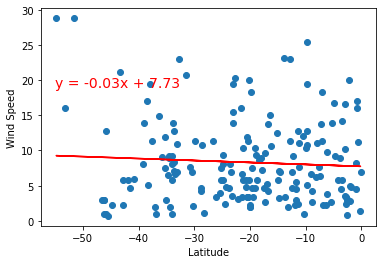

In [103]:
(slope, intercept, rvalue, Pvalue, Sterr) = linregress(Southern_Hem_df['Latitude'], Southern_Hem_df['Wind Speed'])
print(f"The r-squared is: {rvalue ** 2}")

plt.scatter(Southern_Hem_df['Latitude'], Southern_Hem_df['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

#Slope formula: y = mx + b
y = slope * Southern_Hem_df['Latitude'] + intercept

#Linear regression plot and formula display.
plt.plot(Southern_Hem_df['Latitude'], y, color = 'red')
plt.text(-55,19,f"y = {round(slope, 2)}x + {round(intercept , 2)}", fontsize = 14, color = 'Red')
plt.show()